# Comparison of clustering methods

In [2]:
# Import packages
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import plot_clustering_results as clusterplt

### 1. k-means clustering, hierarchical clustering, and DBSCAN using a make_blobs dataset

Silhouette Score: 0.5803990994271508


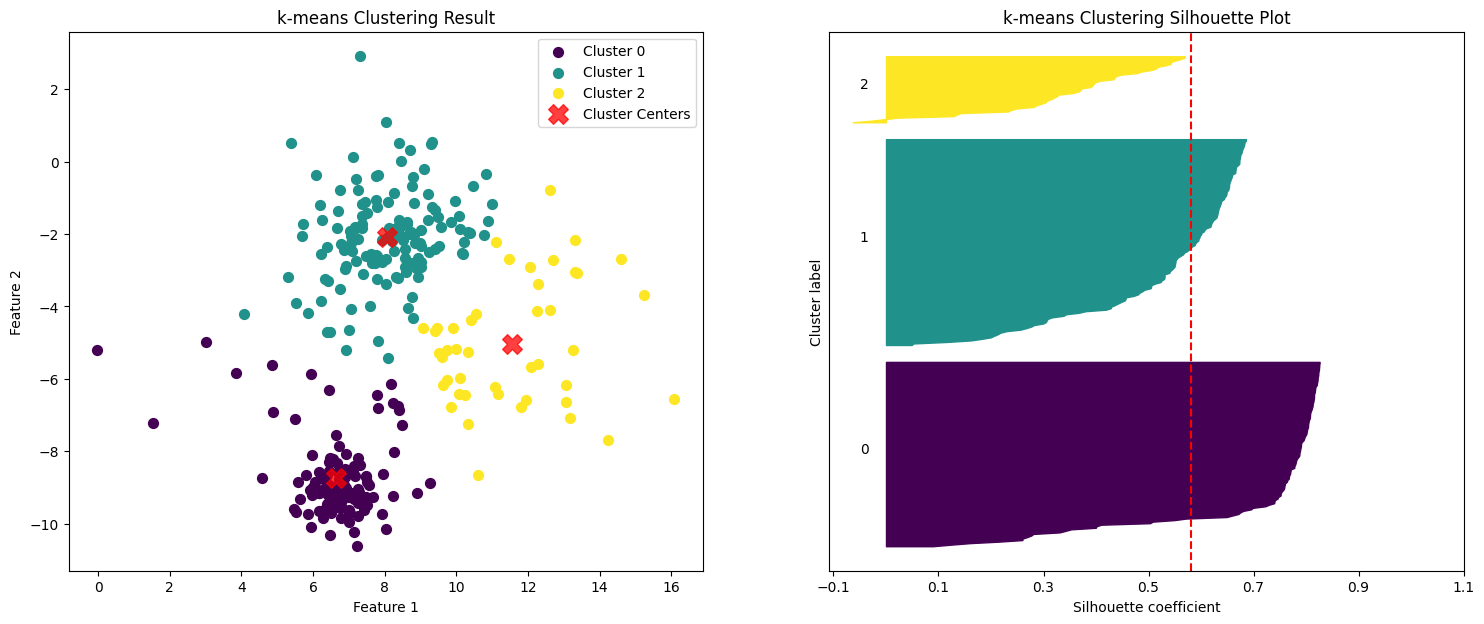

Silhouette Score: 0.5411250975018386


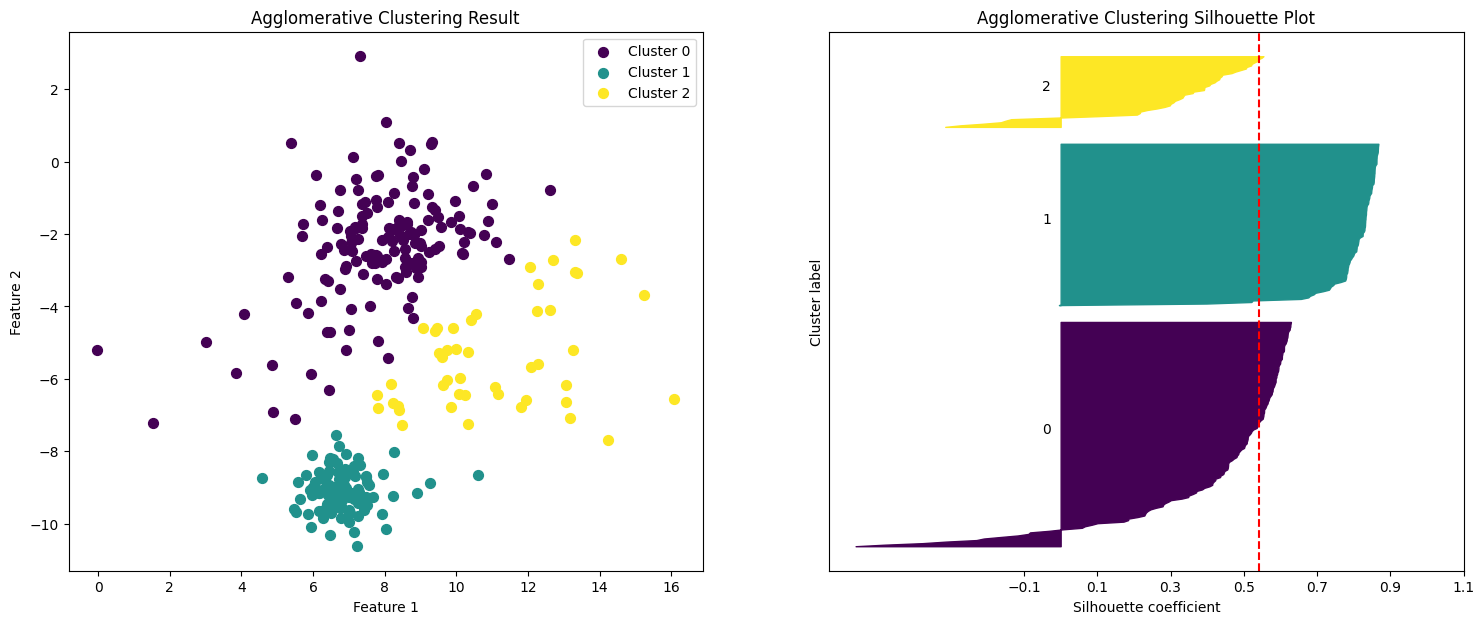

Estimated number of clusters: 2
Estimated number of noise points: 238
Silhouette Score: 0.17587102866577453


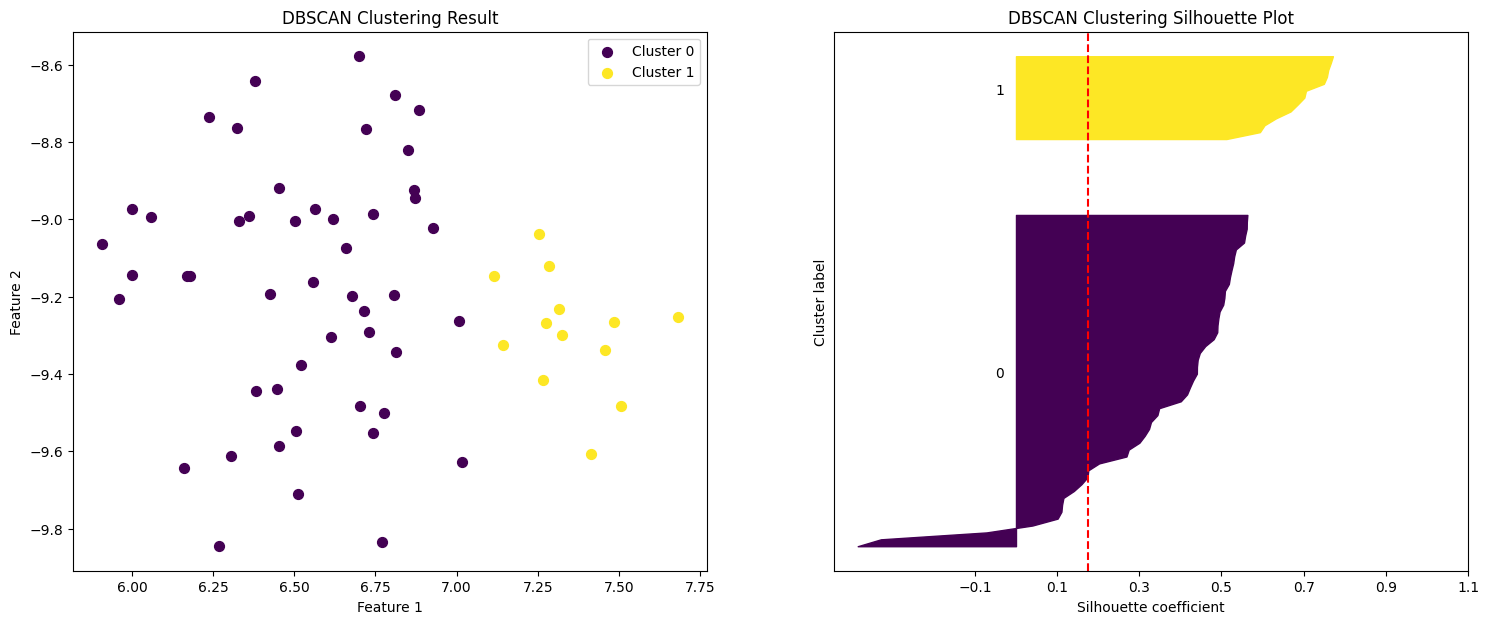

In [10]:
# 1. Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])

# 2. Train a k-Means clustering model
kmeans = KMeans(n_clusters=3, max_iter=15, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

##  Evaluate the model
silhouette_kmeans = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_kmeans}")

## Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
kmeans_blobs_plot = clusterplt.plot_clustering_results("k-means", X, y_kmeans, centers, silhouette_kmeans, n_clusters=3)



# 3. Perform agglomerative clustering
Z = linkage(X, 'ward')

## Plot the dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(Z)
# plt.title('Hierarchical Clustering Dendrogram (Agglomerative)')
# plt.xlabel('Sample index')
# plt.ylabel('Distance')
# plt.show()

## Train an agglomerative clustering model
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(X)

## Evaluate the model
silhouette_agg = silhouette_score(X, y_agg)
print(f"Silhouette Score: {silhouette_agg}")

# Plot the clustering results using the custom function
agg_blobs_plot = clusterplt.plot_clustering_results("Agglomerative",X, y_agg, None, silhouette_agg, n_clusters=3)

# Train a DBSCAN clustering model
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Print summary metrics
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

silhouette_db = silhouette_score(X,labels)
print(f"Silhouette Score: {silhouette_db}")

# Plot DBSCAN results
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

db_blobs_plot = clusterplt.plot_clustering_results("DBSCAN", X, labels, None, silhouette_db, n_clusters=n_clusters_)



Silhouette Score: 0.42081969597709473


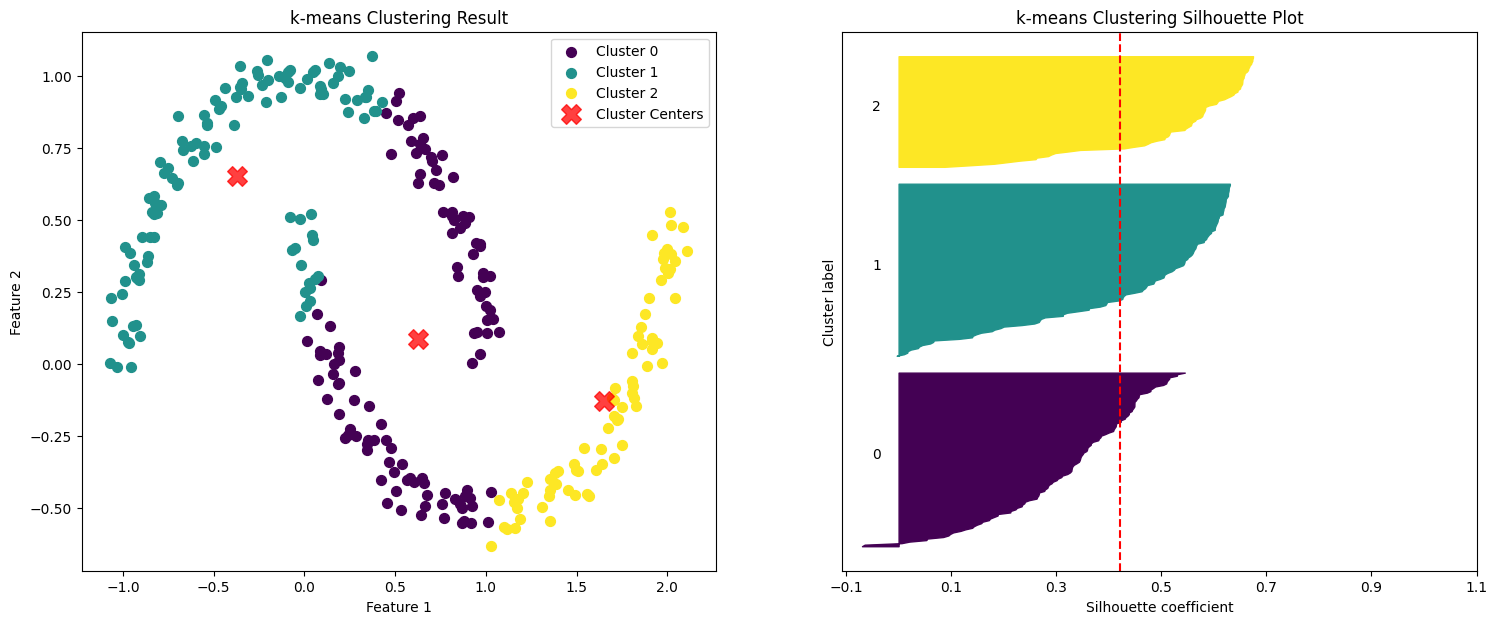

Silhouette Score: 0.40085758055514426


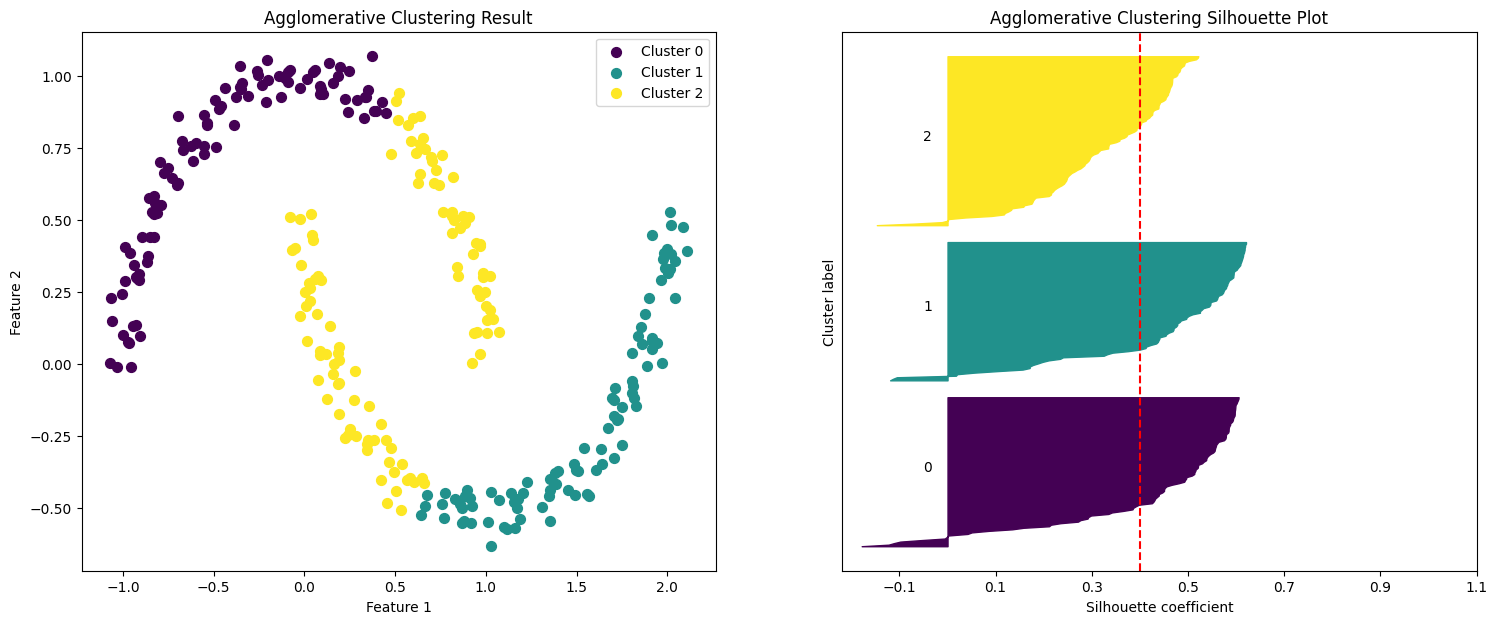

Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Score: 0.32856432038474687


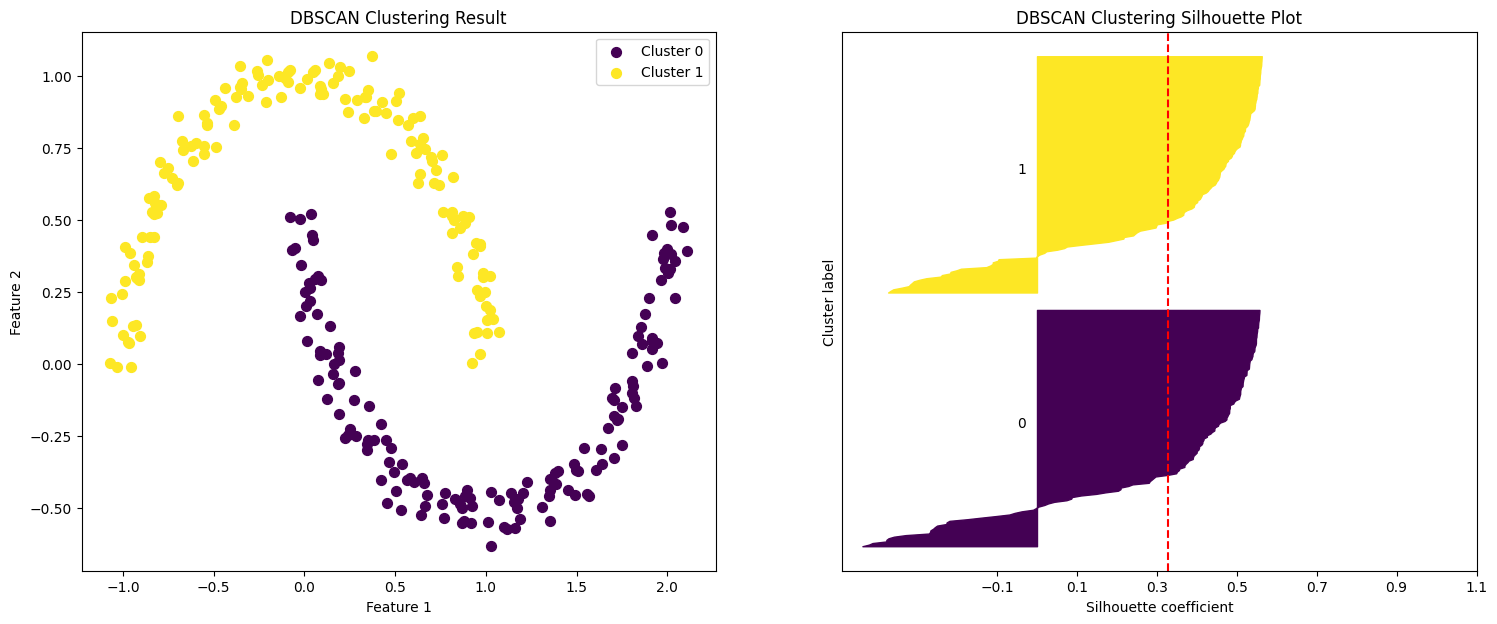

In [11]:
# 1. Generate synthetic data
X, y = make_moons(n_samples=300, noise=0.05) 

# 2. Train a k-Means clustering model
kmeans = KMeans(n_clusters=3, max_iter=15, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

##  Evaluate the model
silhouette_kmeans = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_kmeans}")

## Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
clusterplt.plot_clustering_results("k-means", X, y_kmeans, centers, silhouette_kmeans, n_clusters=3)

# 3. Perform agglomerative clustering
Z = linkage(X, 'ward')

## Plot the dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(Z)
# plt.title('Hierarchical Clustering Dendrogram (Agglomerative)')
# plt.xlabel('Sample index')
# plt.ylabel('Distance')
# plt.show()

## Train an agglomerative clustering model
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(X)

## Evaluate the model
silhouette_agg = silhouette_score(X, y_agg)
print(f"Silhouette Score: {silhouette_agg}")

# Plot the clustering results using the custom function
clusterplt.plot_clustering_results("Agglomerative",X, y_agg, None, silhouette_agg, n_clusters=3)

# Train a DBSCAN clustering model
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Print summary metrics
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

silhouette_db = silhouette_score(X,labels)
print(f"Silhouette Score: {silhouette_db}")

# Plot DBSCAN results
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

clusterplt.plot_clustering_results("DBSCAN",X, labels, None, silhouette_db, n_clusters=n_clusters_)
